## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(data_url)

X = boston_df.drop(columns=['medv'])
y = boston_df['medv']

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar a árvore de regressão com profundidade máxima = 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

# Calcular o MSE para a árvore com profundidade máxima = 2 nos conjuntos de treinamento e teste
mse_train_tree_max_depth_2 = mean_squared_error(y_train, tree_max_depth_2.predict(X_train))
mse_test_tree_max_depth_2 = mean_squared_error(y_test, tree_max_depth_2.predict(X_test))

# Exibir os resultados do MSE
print("MSE para árvore com profundidade máxima = 2:")
print("  - Conjunto de treinamento:", mse_train_tree_max_depth_2)
print("  - Conjunto de teste:", mse_test_tree_max_depth_2)

MSE para árvore com profundidade máxima = 2:
  - Conjunto de treinamento: 25.654637281631615
  - Conjunto de teste: 25.993190895971196


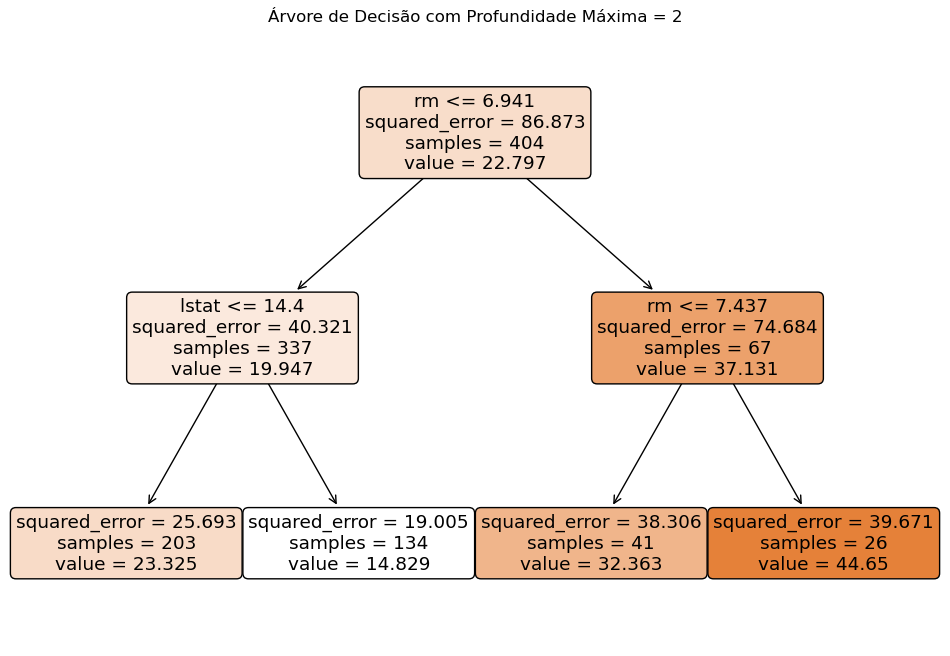

In [5]:
# Plotar a árvore de decisão com profundidade máxima = 2
plt.figure(figsize=(12, 8))
plot_tree(tree_max_depth_2, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.title("Árvore de Decisão com Profundidade Máxima = 2")
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [6]:
path = tree_max_depth_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
path

{'ccp_alphas': array([ 0.        ,  5.94515856, 14.42016147, 40.85344652]),
 'impurities': array([25.65463728, 31.59979584, 46.01995731, 86.87340383])}

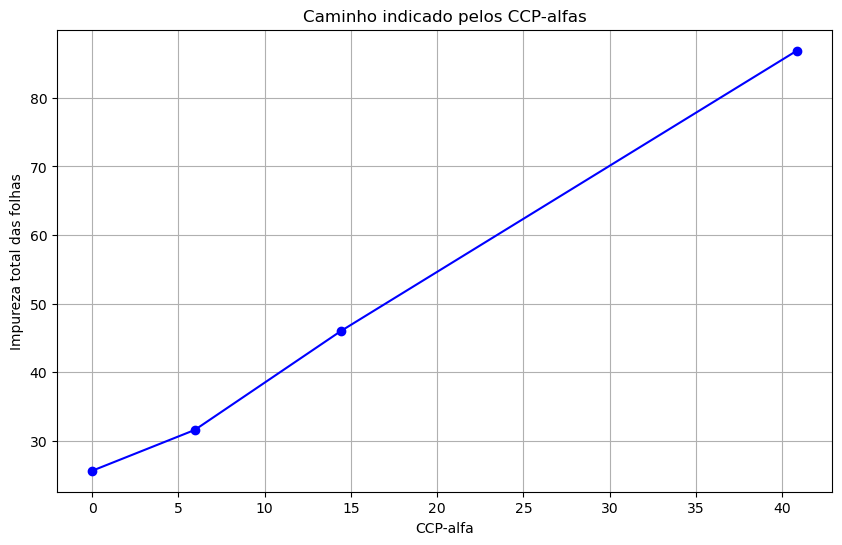

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', linestyle='-', color='b')
plt.xlabel("CCP-alfa")
plt.ylabel("Impureza total das folhas")
plt.title("Caminho indicado pelos CCP-alfas")
plt.grid(True)
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [8]:
lista_arvores = []
for ccp_alpha in ccp_alphas[:-1]:
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    lista_arvores.append(tree)

tree_depths = [tree.tree_.max_depth for tree in lista_arvores]

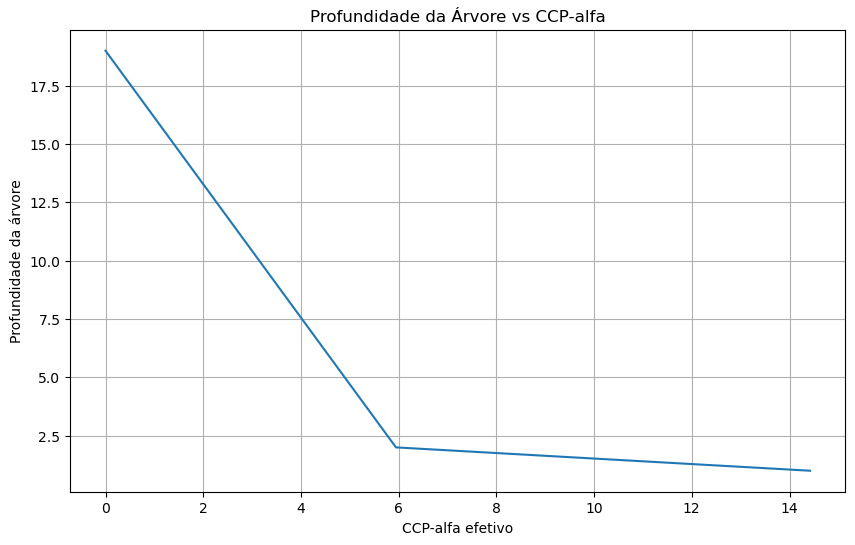

In [9]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], tree_depths)
plt.xlabel("CCP-alfa efetivo")
plt.ylabel("Profundidade da árvore")
plt.title("Profundidade da Árvore vs CCP-alfa")
plt.grid(True)
plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [10]:
train_scores = []
test_scores = []
for tree in lista_arvores:
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_scores.append(train_mse)
    test_scores.append(test_mse)
for i in range(len(lista_arvores)):
    print(f"MSE da árvore {i+1} - Treinamento: {train_scores[i]:.2f}, Teste: {test_scores[i]:.2f}")

MSE da árvore 1 - Treinamento: 0.00, Teste: 10.09
MSE da árvore 2 - Treinamento: 25.65, Teste: 25.99
MSE da árvore 3 - Treinamento: 46.02, Teste: 46.92


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

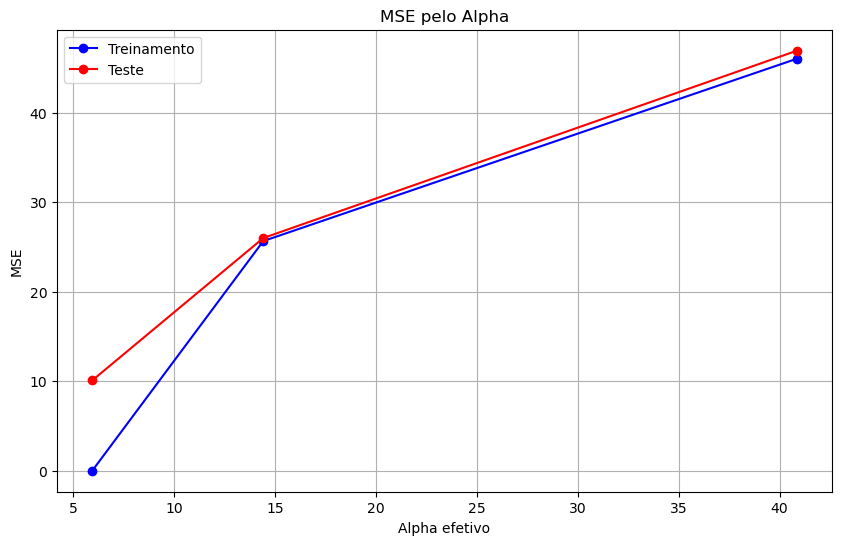

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[1:], train_scores, marker='o', linestyle='-', color='b', label='Treinamento')
plt.plot(ccp_alphas[1:], test_scores, marker='o', linestyle='-', color='r', label='Teste')
plt.xlabel("Alpha efetivo")
plt.ylabel("MSE")
plt.title("MSE pelo Alpha")
plt.legend()
plt.grid(True)
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [19]:
tree_regressor = DecisionTreeRegressor(ccp_alpha = 1.5)
tree_regressor.fit(X_train, y_train)

# Calcular o R-quadrado
r2_score = tree_regressor.score(X_test, y_test)
print("R-quadrado da árvore:", r2_score)

R-quadrado da árvore: 0.8508986770389417


### 7. Visualize esta árvore.

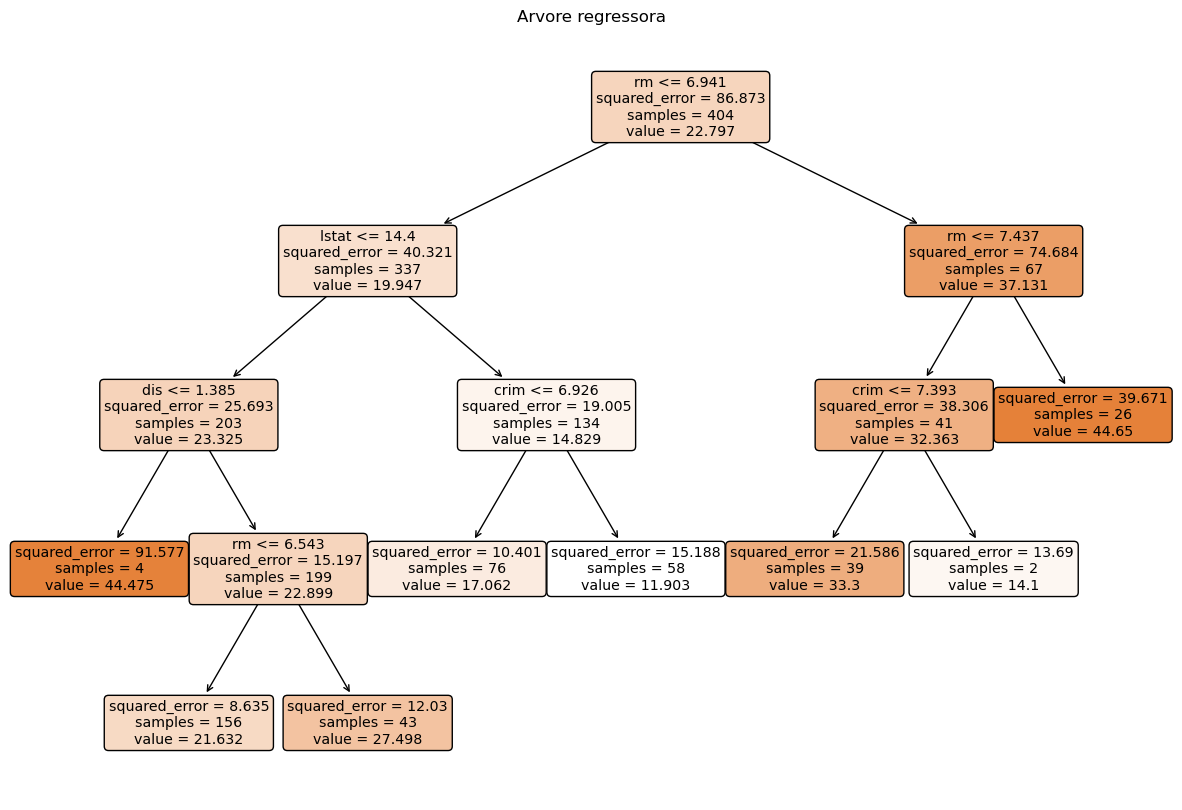

In [22]:
plt.figure(figsize=(15, 10))
plot_tree(tree_regressor, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.title("Arvore regressora")
plt.show()